# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import inspect
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import pickle


In [2]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv",decimal=",").drop_duplicates()
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


# Analysing Data

In [3]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [4]:
df2 = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow','Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density','% Iron Concentrate', '% Silica Concentrate']]

In [5]:
df2

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,66.91,1.31
...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,64.27,1.71
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,64.27,1.71


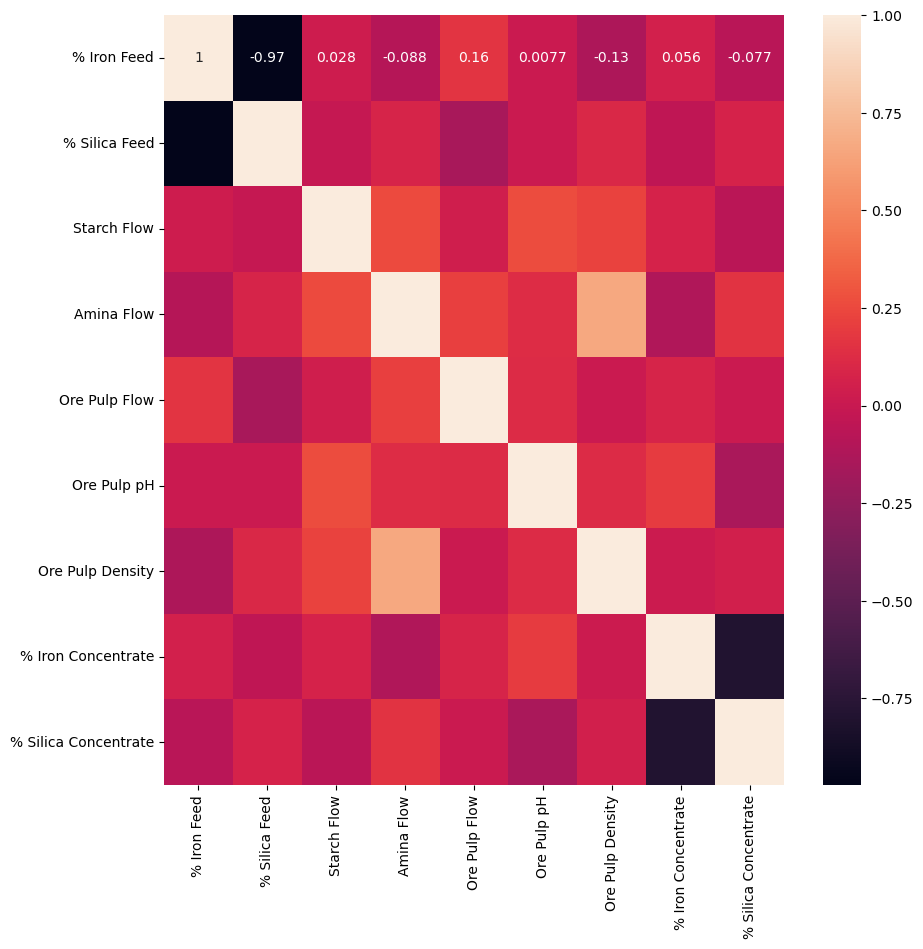

In [6]:
plt.figure(figsize=(10, 10))
cor= df2.corr()
corelation = sns.heatmap(cor, annot=True)

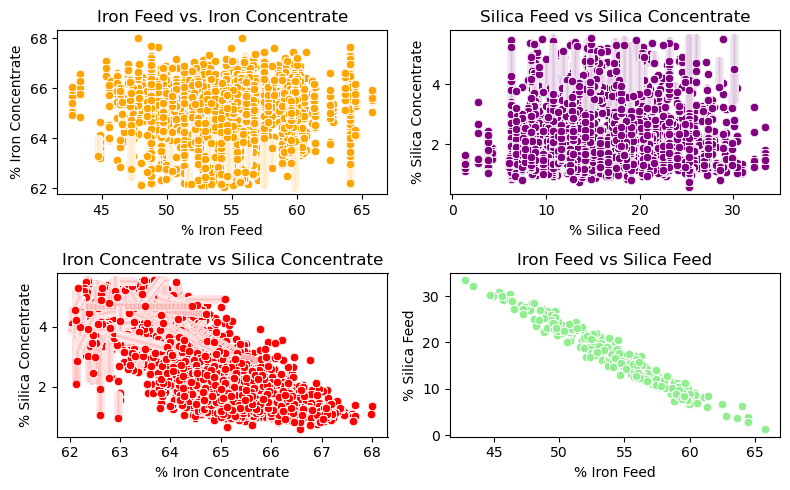

In [7]:
fig, axes = plt.subplots(2,2, figsize=(8,5))

sns.scatterplot(x='% Iron Feed', y='% Iron Concentrate', data=df2, ax=axes[0,0],color="orange")
axes[0,0].set_title('Iron Feed vs. Iron Concentrate')

sns.scatterplot(x='% Silica Feed', y='% Silica Concentrate', data=df2, ax=axes[0,1],color="purple")
axes[0,1].set_title('Silica Feed vs Silica Concentrate')

sns.scatterplot(x='% Iron Concentrate', y='% Silica Concentrate', data=df2, ax=axes[1,0],color="red")
axes[1,0].set_title('Iron Concentrate vs Silica Concentrate')


sns.scatterplot(x='% Iron Feed', y='% Silica Feed', data=df2, ax=axes[1,1],color="lightgreen")
axes[1,1].set_title('Iron Feed vs Silica Feed')

plt.tight_layout()
plt.show()

# Outlier Detection

Text(0.5, 1.0, 'Combined Concentration')

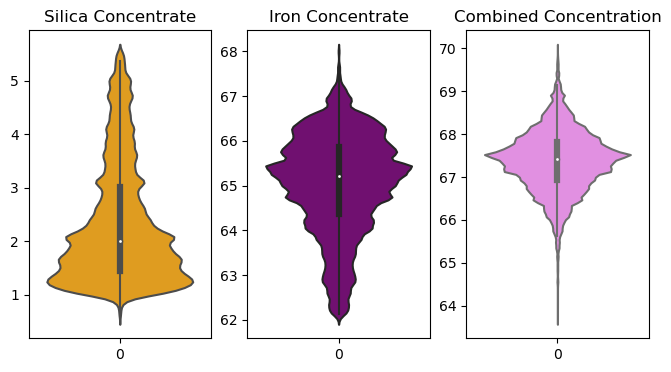

In [8]:
fig,axes = plt.subplots(1,3,figsize=(8,4))

sns.violinplot(df['% Silica Concentrate'], ax=axes[0],color="orange")
axes[0].set_title('Silica Concentrate')

sns.violinplot(df['% Iron Concentrate'], ax=axes[1],color="purple")
axes[1].set_title('Iron Concentrate')

sns.violinplot(df['% Iron Concentrate']+df["% Silica Concentrate"], ax=axes[2],color="violet")
axes[2].set_title('Combined Concentration')

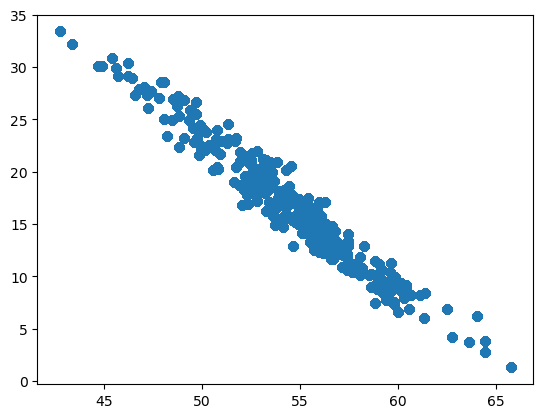

In [9]:
plt.scatter(df['% Iron Feed'],df['% Silica Feed'])

In [10]:
print(list(df.columns))

['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']


In [11]:
df.shape

(736282, 24)

# Spliting the data into training and testing set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['% Silica Concentrate','date'],axis=1)
y = df['% Silica Concentrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [14]:
print(X_train.shape)

(589025, 22)


In [15]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147257, 22)
(589025,)
(147257,)


# Training the Models

## Training pipeline

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
class Model:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.evaluation_df = pd.DataFrame(columns = ['train_MAE','test_MAE','train_MSE','test_MSE','train_RMSE','test_RMSE','train_R2_Score','test_R2_Score'])
        self.model = None

    def fit_linear_regression(self):
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)
        with open('lr_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_ridge(self, alpha=1.0):
        self.model = Ridge(alpha=alpha)
        self.model.fit(self.X_train, self.y_train)
        with open('rd_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_lasso(self, alpha=1.0):
        self.model = Lasso(alpha=alpha)
        self.model.fit(self.X_train, self.y_train)
        with open('ls_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_elastic_net(self, alpha=1.0, l1_ratio=0.5):
        self.model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        self.model.fit(self.X_train, self.y_train)
        with open('en_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_decision_tree(self, max_depth=None):
        self.model = DecisionTreeRegressor(max_depth=max_depth)
        self.model.fit(self.X_train, self.y_train)
        with open('dt_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_random_forest(self, max_depth=None):
        self.model = RandomForestRegressor(max_depth=max_depth)
        self.model.fit(self.X_train, self.y_train)
        with open('rf_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def fit_gradient_boosting(self, n_estimators=80, learning_rate=0.1, max_depth=12):
        self.model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth,criterion="squared_error")
        self.model.fit(self.X_train, self.y_train)
        with open('gb_model.pkl', 'wb') as file:
            pickle.dump(self.model, file)
        return self.evaluate_model()

    def evaluate_model(self):
        y_pred_train = self.model.predict(self.X_train)
        y_pred_test = self.model.predict(self.X_test)
        
        metrics = {
            "train_mae": mean_absolute_error(self.y_train, y_pred_train),
            "test_mae": mean_absolute_error(self.y_test, y_pred_test),
            "train_mse": mean_squared_error(self.y_train, y_pred_train),
            "test_mse": mean_squared_error(self.y_test, y_pred_test),
            "train_rmse":np.sqrt(mean_squared_error(self.y_train, y_pred_train)),
            "test_rmse" : np.sqrt(mean_squared_error(self.y_test,y_pred_test)),
            "train_r2": r2_score(self.y_train, y_pred_train),
            "test_r2": r2_score(self.y_test, y_pred_test)
        }

        stack = inspect.stack()
        caller_frame = stack[1]
        caller_name = caller_frame.function
        eval_array = metrics.values()
        if caller_name == "fit_linear_regression":
            self.evaluation_df.loc["Linear Regression"] = eval_array
        elif caller_name == "fit_ridge":
            self.evaluation_df.loc["Ridge Regression"] = eval_array
        elif caller_name == "fit_lasso":
            self.evaluation_df.loc["Lasso Regression"] = eval_array
        elif caller_name == "fit_elastic_net":
            self.evaluation_df.loc["ElasticNet Regression"] = eval_array
        elif caller_name == "fit_decision_tree":
            self.evaluation_df.loc["Decision Tree Regression"] = eval_array
        elif caller_name == "fit_random_forest":
            self.evaluation_df.loc["Random Forest Regression"] = eval_array
        elif caller_name == "fit_gradient_boosting":
            self.evaluation_df.loc["Gradient Boosting Regression"] = eval_array
        return metrics

In [18]:
model = Model(X_train,X_test, y_train,y_test)

In [19]:
model.fit_linear_regression()

{'train_mae': 0.49241182416835655,
 'test_mae': 0.49219380962883263,
 'train_mse': 0.40606288296394616,
 'test_mse': 0.40618859834170973,
 'train_rmse': 0.6372306356131555,
 'test_rmse': 0.637329269955264,
 'train_r2': 0.6793367504030563,
 'test_r2': 0.6801054755719615}

In [20]:
model.fit_ridge()

{'train_mae': 0.49241194547462597,
 'test_mae': 0.4921939381051845,
 'train_mse': 0.4060628830013647,
 'test_mse': 0.40618860865428225,
 'train_rmse': 0.6372306356425158,
 'test_rmse': 0.6373292780457228,
 'train_r2': 0.6793367503735073,
 'test_r2': 0.6801054674502776}

In [21]:
model.fit_lasso()

{'train_mae': 0.8433241894600407,
 'test_mae': 0.8455021498992554,
 'train_mse': 1.1204241878081895,
 'test_mse': 1.1258885784642738,
 'train_rmse': 1.0585009153553857,
 'test_rmse': 1.0610789690047926,
 'train_r2': 0.1152137364362592,
 'test_r2': 0.11330452691880688}

In [22]:
model.fit_elastic_net()

{'train_mae': 0.6812842180427664,
 'test_mae': 0.6834295951325057,
 'train_mse': 0.7417747169218917,
 'test_mse': 0.7451776991920432,
 'train_rmse': 0.8612634422300134,
 'test_rmse': 0.86323675732214,
 'train_r2': 0.4142289256756665,
 'test_r2': 0.41313403017560646}

In [23]:
model.fit_decision_tree()

{'train_mae': 5.553345087661132e-15,
 'test_mae': 0.0071816200716380224,
 'train_mse': 7.8308239410440245e-28,
 'test_mse': 0.007141003831691112,
 'train_rmse': 2.7983609383072842e-14,
 'test_rmse': 0.08450446042482676,
 'train_r2': 1.0,
 'test_r2': 0.9943760902349211}

In [24]:
model.fit_random_forest()

{'train_mae': 0.0037172310994360316,
 'test_mae': 0.009621785612292544,
 'train_mse': 0.00027077466501592855,
 'test_mse': 0.0017980388306560254,
 'train_rmse': 0.016455232147129635,
 'test_rmse': 0.04240328796987358,
 'train_r2': 0.9997861723205067,
 'test_r2': 0.9985839514477165}

In [25]:
model.fit_gradient_boosting()

{'train_mae': 0.050394624871945445,
 'test_mae': 0.055397960832891634,
 'train_mse': 0.005991938803970034,
 'test_mse': 0.007852675194003265,
 'train_rmse': 0.07740761463816098,
 'test_rmse': 0.08861532144050072,
 'train_r2': 0.9952682339389349,
 'test_r2': 0.9938156122379381}

In [26]:
evaluation_df = model.evaluation_df
evaluation_df.to_csv('evaluation_data.csv')

In [27]:
evaluation_df

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2_Score,test_R2_Score
Linear Regression,4.924118e-01,0.492194,4.060629e-01,0.406189,6.372306e-01,0.637329,0.679337,0.680105
Ridge Regression,4.924119e-01,0.492194,4.060629e-01,0.406189,6.372306e-01,0.637329,0.679337,0.680105
Lasso Regression,8.433242e-01,0.845502,1.120424e+00,1.125889,1.058501e+00,1.061079,0.115214,0.113305
ElasticNet Regression,6.812842e-01,0.683430,7.417747e-01,0.745178,8.612634e-01,0.863237,0.414229,0.413134
Decision Tree Regression,5.553345e-15,0.007182,7.830824e-28,0.007141,2.798361e-14,0.084504,1.000000,0.994376
Random Forest Regression,3.717231e-03,0.009622,2.707747e-04,0.001798,1.645523e-02,0.042403,0.999786,0.998584
Gradient Boosting Regression,5.039462e-02,0.055398,5.991939e-03,0.007853,7.740761e-02,0.088615,0.995268,0.993816


In [ ]:
# Analysing Results

# loading all the models now
with open('lr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_lr = loaded_model.predict(X_test)

with open('rd_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_rd = loaded_model.predict(X_test)

with open('ls_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_ls = loaded_model.predict(X_test)

with open('en_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_en = loaded_model.predict(X_test)

with open('dt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_dt = loaded_model.predict(X_test)

with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_rf = loaded_model.predict(X_test)

with open('gb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_gb = loaded_model.predict(X_test)

In [29]:
results = pd.DataFrame()
results['Actual'],results['Predicted Linear'],results['Predicted Ridge'],results['Predicted Lasso'],results['Predicted ElasticNet'],results['Predicted Decision Tree'],results['Predicted Random Forest'],results["Predicted Gradient Boosting"] = y_test,y_pred_lr,y_pred_rd,y_pred_ls,y_pred_en,y_pred_dt,y_pred_rf,y_pred_gb
results.to_csv("result_data.csv")

In [30]:
results

,Actual,Predicted Linear,Predicted Ridge,Predicted Lasso,Predicted ElasticNet,Predicted Decision Tree,Predicted Random Forest,Predicted Gradient Boosting
7708,3.420000,2.287125,2.287122,2.607146,2.496736,3.4200,3.420000,3.385019
432427,1.620000,1.915889,1.915893,2.013431,1.982802,1.6200,1.621600,1.687012
549846,1.390000,1.720788,1.720790,2.567378,2.321685,1.6800,1.449300,1.481985
158043,2.580000,1.377695,1.377705,2.309978,2.023365,2.5800,2.518400,2.412266
566657,2.080000,2.019080,2.019075,2.518480,2.378318,2.0800,2.080000,2.066099
...,...,...,...,...,...,...,...,...
254365,2.290000,1.705110,1.705109,2.047942,1.945137,2.2900,2.290000,2.026746
84996,2.094048,2.238364,2.238363,2.688000,2.561628,2.0922,2.094214,2.101031
578411,3.680000,3.190200,3.190193,1.921899,2.343436,3.6800,3.680000,3.652935
410461,1.690000,1.744193,1.744195,2.290379,2.061966,1.6900,1.690700,1.648644


# Scatter Plot Analysis

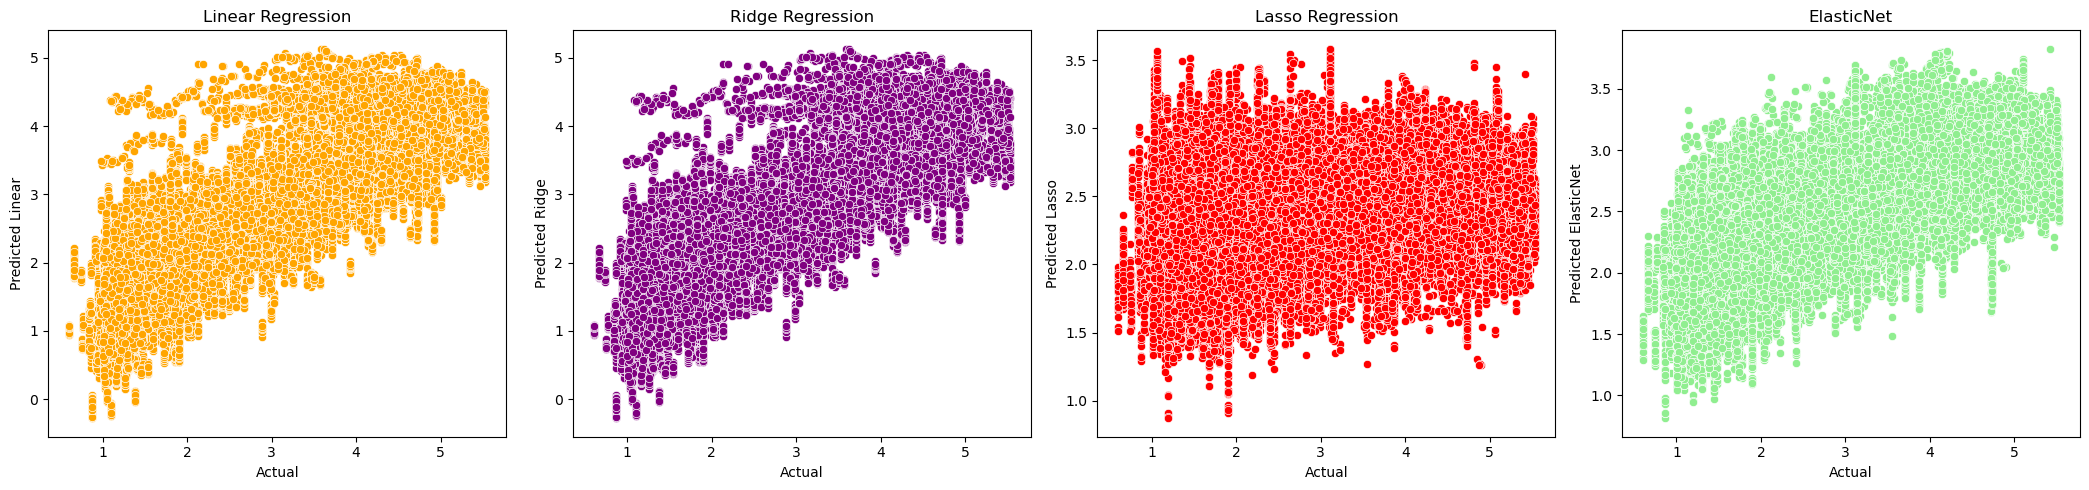

In [31]:
fig, axes = plt.subplots(1,4, figsize=(21,5))

sns.scatterplot(x='Actual', y='Predicted Linear', data=results, ax=axes[0],color="orange")
axes[0].set_title('Linear Regression')

sns.scatterplot(x='Actual', y='Predicted Ridge', data=results, ax=axes[1],color="purple")
axes[1].set_title('Ridge Regression')

sns.scatterplot(x='Actual', y='Predicted Lasso', data=results, ax=axes[2],color="red")
axes[2].set_title('Lasso Regression')


sns.scatterplot(x='Actual', y='Predicted ElasticNet', data=results, ax=axes[3],color="lightgreen")
axes[3].set_title('ElasticNet')

plt.tight_layout()
plt.show()

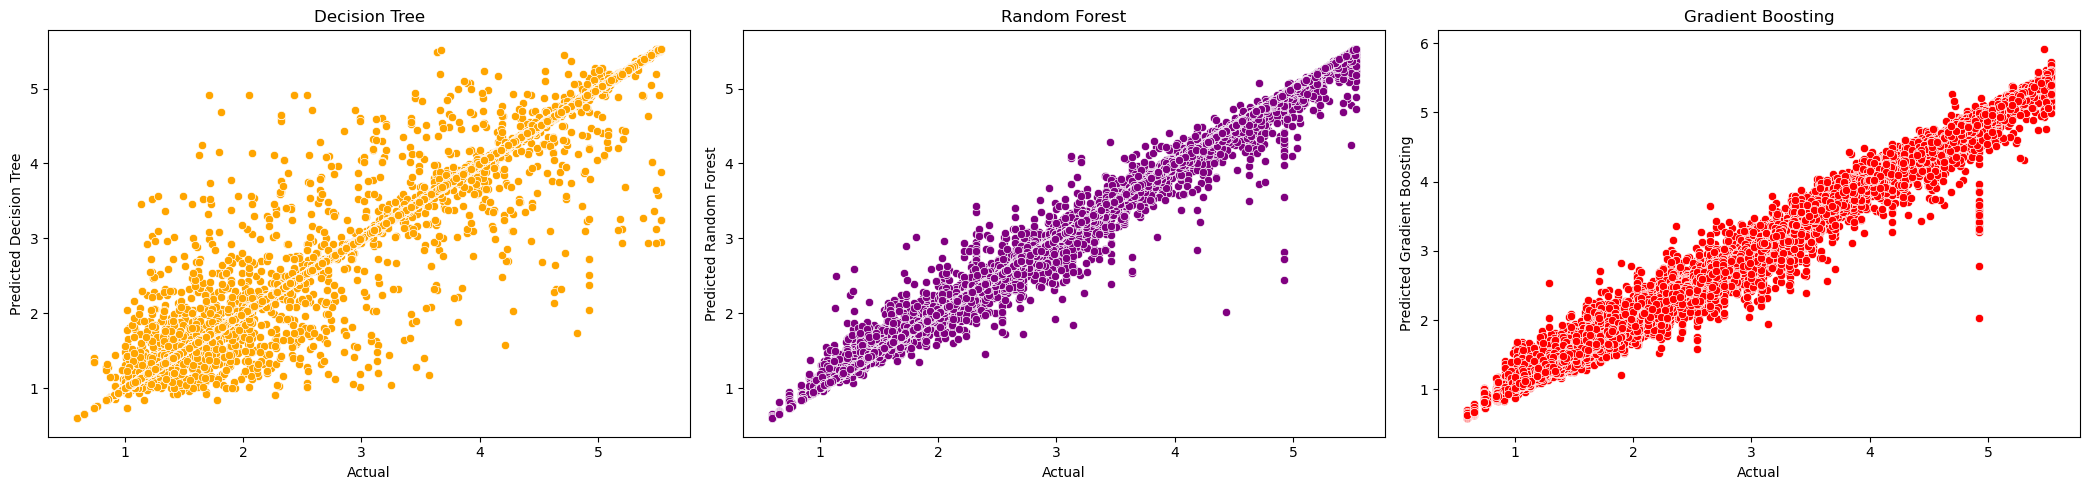

In [32]:
fig, axes = plt.subplots(1,3, figsize=(21,5))

sns.scatterplot(x='Actual', y='Predicted Decision Tree', data=results, ax=axes[0],color="orange")
axes[0].set_title('Decision Tree')

sns.scatterplot(x='Actual', y='Predicted Random Forest', data=results, ax=axes[1],color="purple")
axes[1].set_title('Random Forest')

sns.scatterplot(x='Actual', y='Predicted Gradient Boosting', data=results, ax=axes[2],color="red")
axes[2].set_title('Gradient Boosting')

plt.tight_layout()
plt.show()

# Residual Plot Analysis

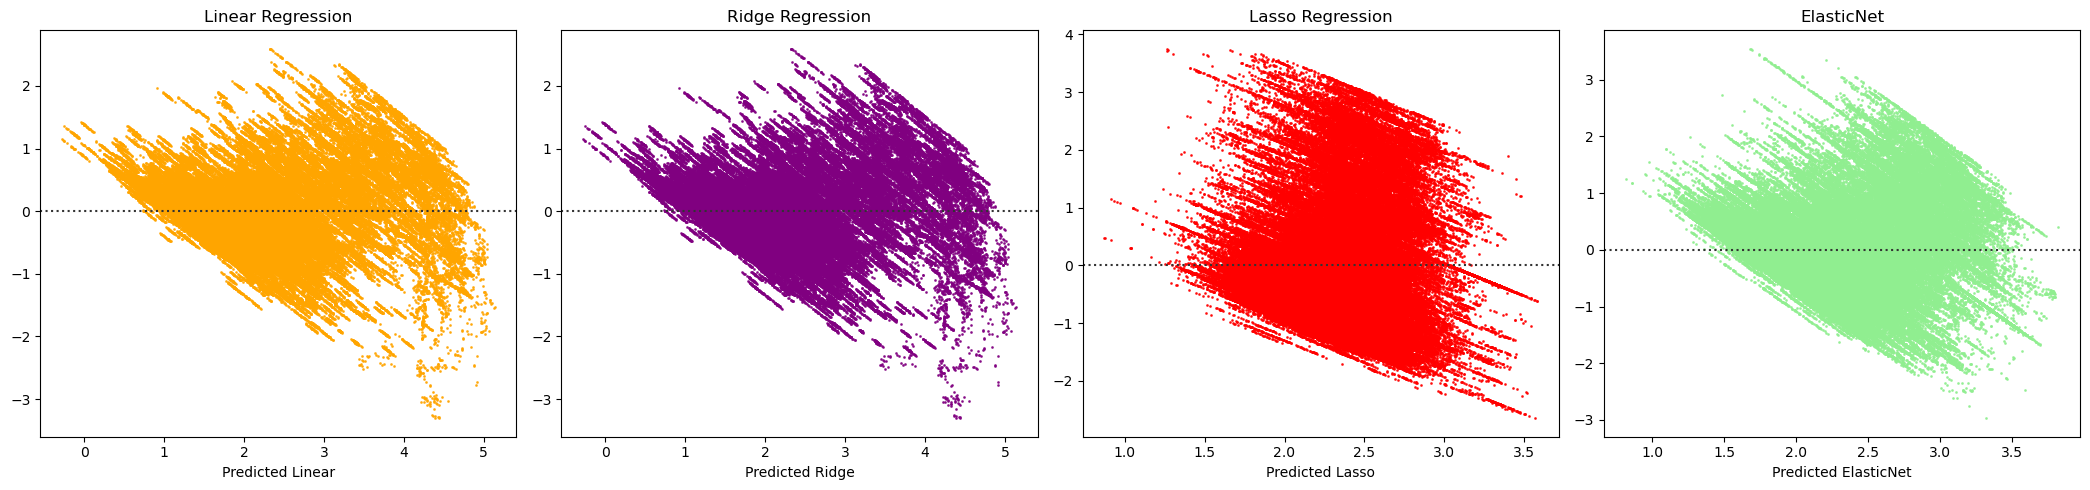

In [33]:
fig, axes = plt.subplots(1,4, figsize=(21,5))

sns.residplot(x=results['Predicted Linear'], y=results['Actual']-results['Predicted Linear'], ax=axes[0],color="orange",scatter_kws={'s': 1})
axes[0].set_title('Linear Regression')

sns.residplot(x=results['Predicted Ridge'], y=results['Actual']-results['Predicted Ridge'], ax=axes[1],color="purple",scatter_kws={'s': 1})
axes[1].set_title('Ridge Regression')

sns.residplot(x=results['Predicted Lasso'], y=results['Actual']-results['Predicted Lasso'], ax=axes[2],color="red",scatter_kws={'s': 1})
axes[2].set_title('Lasso Regression')


sns.residplot(x=results['Predicted ElasticNet'], y=results['Actual']-results['Predicted ElasticNet'], ax=axes[3],color="lightgreen",scatter_kws={'s': 1})
axes[3].set_title('ElasticNet')

plt.tight_layout()
plt.show()

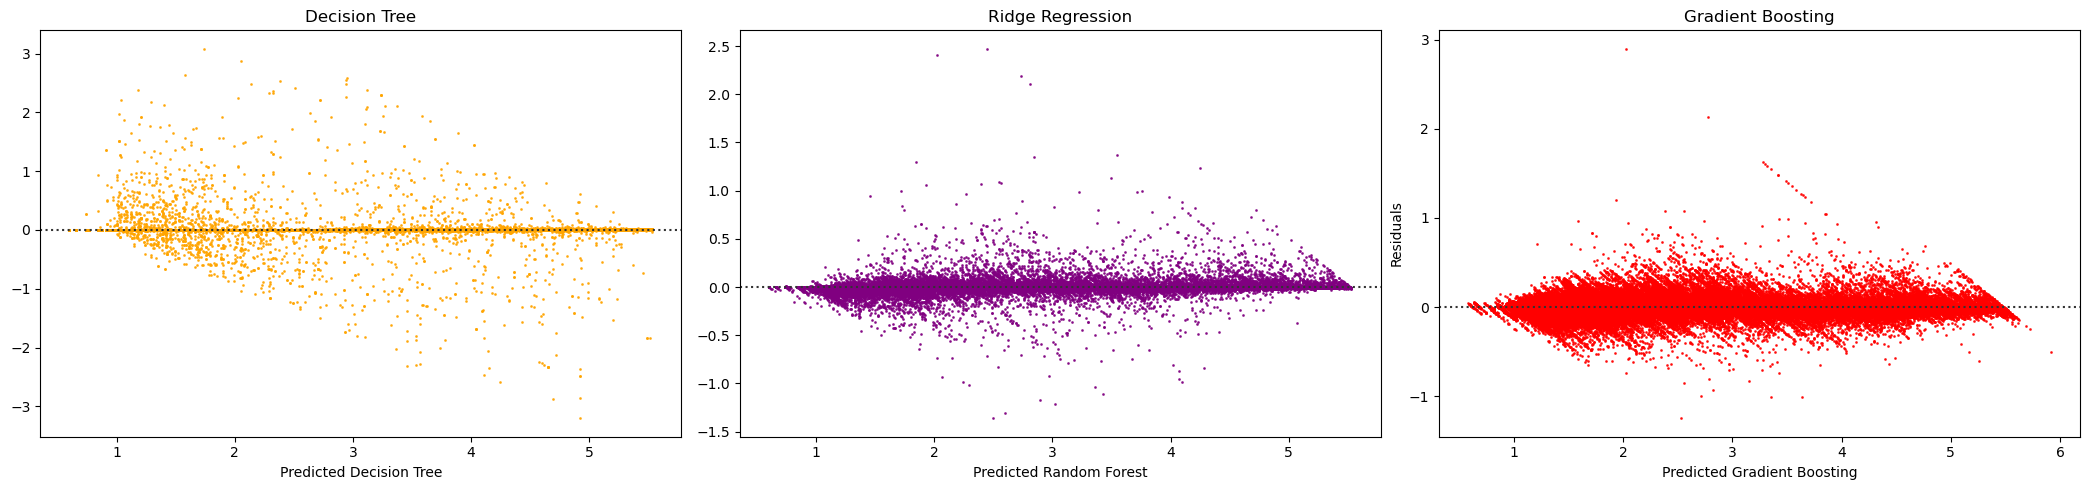

In [34]:
fig, axes = plt.subplots(1,3, figsize=(21,5))

sns.residplot(x=results['Predicted Decision Tree'], y=results['Actual']-results['Predicted Decision Tree'], ax=axes[0],color="orange",scatter_kws={'s': 1})
axes[0].set_title('Decision Tree')

sns.residplot(x=results['Predicted Random Forest'], y=results['Actual']-results['Predicted Random Forest'], ax=axes[1],color="purple",scatter_kws={'s': 1})
axes[1].set_title('Ridge Regression')

sns.residplot(x=results['Predicted Gradient Boosting'], y=results['Actual']-results['Predicted Gradient Boosting'], ax=axes[2],color="red",scatter_kws={'s': 1})
axes[2].set_title('Gradient Boosting')

plt.tight_layout()
plt.ylabel("Residuals")
plt.show()

In [68]:
 import warnings
warnings.filterwarnings('ignore')

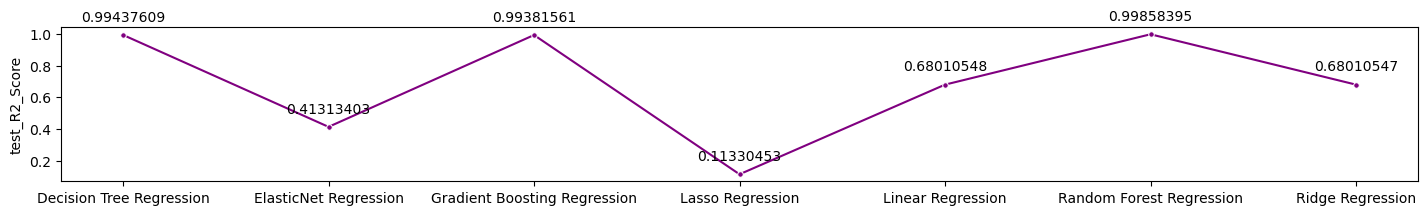

In [69]:
plt.figure(figsize=(17.5,2))
sns.lineplot(data=evaluation_df, x=evaluation_df.index, y='test_R2_Score', marker='o', markersize=4, color='purple')
for i, row in evaluation_df.iterrows():
    plt.annotate(f'{row["test_R2_Score"]:.8f}', (i, row['test_R2_Score']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

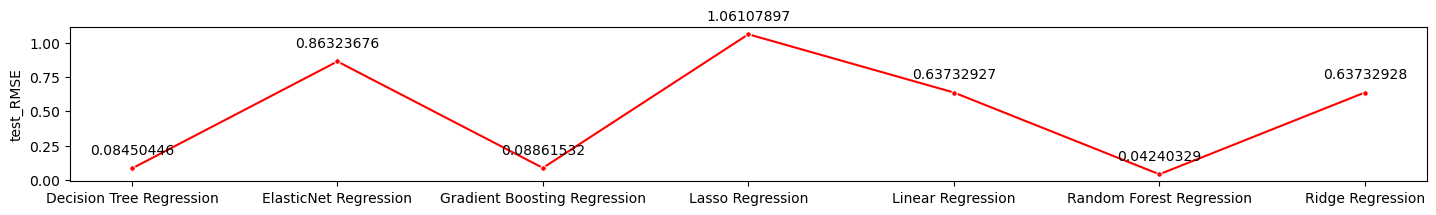

In [70]:
plt.figure(figsize=(17.5,2))
sns.lineplot(data=evaluation_df, x=evaluation_df.index, y='test_RMSE', marker='o', markersize=4, color='red')
for i, row in evaluation_df.iterrows():
    plt.annotate(f'{row["test_RMSE"]:.8f}', (i, row['test_RMSE']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

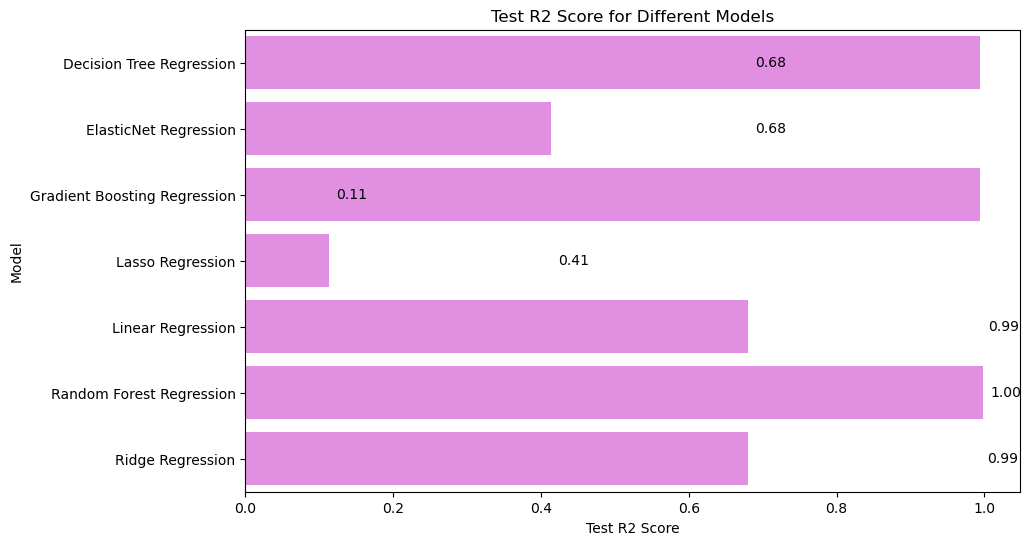

In [71]:
evaluation_df.index = evaluation_df.index.astype('category')

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=evaluation_df, x='test_R2_Score', y=evaluation_df.index, color='violet')

# Annotate each bar with its value
for index, value in enumerate(evaluation_df['test_R2_Score']):
    ax.text(value + 0.01, index, f'{value:.2f}', color='black', ha='left', va='center')

# Display the plot
plt.xlabel('Test R2 Score')
plt.ylabel('Model')
plt.title('Test R2 Score for Different Models')
plt.show()